In [9]:
%matplotlib inline
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import helpers
pandas.set_option('display.max_columns', None)

# Предварительный обзор данных

In [10]:
df = pandas.read_csv('./data/features.csv', index_col='match_id')

In [11]:
desc = df.describe()
desc

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,77677.000000,77677.000000,77677.000000,53243.000000,81539.000000,96538.000000,69751.000000,97230.000000,97230.000000,97230.000000,97230.000000,95394.000000,81087.000000,96554.000000,71132.000000,97230.000000,97230.000000,97230.000000,97230.000000,95404.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,8.271315,52.183452,3.364661,1189.223676,1107.863993,10.471747,0.348709,0.363550,8.275584,52.710491,3.353924,1182.879965,1099.643742,10.333004,0.342723,0.357338,8.273527,52.648092,3.308896,1159.088481,1082.090240,9.981909,0.337746,0.357307,8.275049,52.625630,3.304237,1158.586167,1082.057061,9.995351,0.337262,0.352782,8.288491,51.990106,3.461123,1238.855765,1151.018184,11.253841,0.372262,0.344091,8.296380,52.708547,3.388933,1199.858809,1108.633436,10.460424,0.356238,0.347012,8.310419,52.755137,3.378638,1193.554438,1103.273702,10.386918,0.353533,0.347732,8.305420,52.922421,3.337725,1171.952155,1088.711653,10.035349,0.354952,0.341860,8.319665,53.059694,3.345274,1177.395351,1089.558850,10.053739,0.356063,0.342538,8.323048,97.688029,0.521815,4.593483,4.383224,126.800255,-80.059510,215.987126,2.994775,3.312527,2.431719,0.716250,-6.875747,127.215028,-80.191893,214.870536,2.965566,3.349553,2.448339,0.689119,-6.901922,2332.247886,0.518503,1309.227790,1286.310820,40.599095,41.337036
std,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,2.497575,32.674077,1.097536,555.363510,458.001007,8.972073,0.654060,0.624236,2.433864,32.560923,1.092126,554.899600,454.727127,8.950871,0.647774,0.618071,2.440139,32.670519,1.092502,550.937530,450.353291

In [12]:
df.head(10)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,0,1,11,4,3,1058,996,12,0,0,6,42,4,1085,986,12,0,0,4,21,5,2052,1536,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,0,0,5,39,5,1960,1384,16,0,0,8,88,3,640,566,1,0,1,5,79,3,720,1350,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,0,0,9,22,5,2305,2028,19,1,1,10,66,3,1024,959,19,0,1,10,86,3,755,620,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,0,0,6,96,5,1878,1174,17,0,0,6,48,3,732,1468,22,0,0,10,15,4,1681,1051,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,0,0,8,26,3,704,586,1,0,2,9,69,3,1169,1665,20,1,0,7,22,3,1055,638,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,2449,0,4,1974,3,63
5,1430284186,1,11,5,1961,1461,19,0,1,6,20,2,441,686,4,0,0,5,28,4,1874,1438,22,0,0,4,25,2,528,800,1,1,0,9,65,3,799,785,6,0,1,6,55,3,847,785,7,0,1,7,52,2,455,967,2,1,0,11,3,2,279,916,0,1,0,10,73,5,2065,2565,26,0,0,13,48,5,2029,1781,29,0,0,8,78.0,1.0,7.0,NaN,35.0,-85.0,182.0,5,4,2,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0,1453,0,512,2038,0,63
8,1430293701,1,8,3,967,1136,7,1,0,8,57,4,1774,1592,19,1,0,8,7,3,904,1119,7,0,1,12,21,4,1523,1061,5,1,1,8,36,2,553,657,1,0,2,10,22,4,1958,1680,19,1,1,9,30,3,1026,704,0,0,1,8,72,3,1161,1668,19,1,0,9,101,3,681,931,6,1,1,13,47,5,2282,1998,30,1,0,16,-34.0,1.0,7.0,NaN,229.0,-77.0,299.0,11,3,3,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0,1968,0,1536,1983,12,63
9,1430299335,7,35,5,2117,1252,16,0,0,6,15,3,1378,1430,23,0,0,4,83,2,259,500,0,0,0,6,29,3,825,818,8,0,0,8,101,2,357,500,0,0,0,7,100,2,350,523,0,0,0,9,25,5,2323,1890,25,0,0,7,26,2,310,523,0,0,0,7,44,4,1387,1275,19,0,0,7,96,4,1408,883,8,0,0,7,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,1,2,2,1,26.0,119.0,

#### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier" 
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`

## Обзор пропусков в данных


In [13]:
rows = len(df)
counts = desc.T['count']
counts_na = counts[counts < rows]
counts_na.sort_values().apply(lambda c: (rows - c) / rows)

first_blood_player2            0.452402
radiant_flying_courier_time    0.282619
dire_flying_courier_time       0.268415
first_blood_time               0.201100
first_blood_team               0.201100
first_blood_player1            0.201100
dire_bottle_time               0.166029
radiant_bottle_time            0.161380
radiant_first_ward_time        0.018883
dire_first_ward_time           0.018780
radiant_courier_time           0.007117
dire_courier_time              0.006953
Name: count, dtype: float64

### Обоснование пропусков:
* **first_blood_player2** (второй игрок, причастный к событию) - первое убийство может быть совершено одним игроком, это достаточно частое явление и происходит в 45% случаев
* **radiant_flying_courier_time** (время приобретения предмета "flying_courier") - в 28% случаев команда не покупает "flying_courier" в первые 5 минут игры
* **dire_flying_courier_time** - аналогично radiant_flying_courier_time, процент почти тот же (26%)
* **first_blood_time** (игровое время первой крови) - в 20% случаев первой крови нет в первые 5 минут игры
* **first_blood_team** (команда, совершившая первую кровь) - аналогично first_blood_time, процент совпадает (20%)
* **first_blood_player1** (игрок, причастный к событию) - аналогично first_blood_time, процент совпадает (20%)
* **dire_bottle_time** (время первого приобретения командой предмета "bottle") - в 16% случаев команда не приобретает предмет "bottle" в первые 5 минут игры
* **radiant_bottle_time** - аналогично dire_bottle_time, процент почти тот же (16%)
* **radiant_first_ward_time** (время установки командой первого "наблюдателя") - очень редкое явление, в 1% случаев команда не ставит "наблюдателя" в первые 5 минут игры
* **dire_first_ward_time** - аналогично dire_bottle_time, процент почти тот же (1%)
* **radiant_courier_time** (время приобретения предмета "courier") - самое редкое явление, в 0.5% случаев команда не приобретает предмет "courier" в первые 5 минут игры
* **dire_courier_time** - аналогично radiant_courier_time, процент почти тот же (0.5%)

# Предобработка данных

In [14]:
# Загружаем данные
train = pandas.read_csv('./data/features.csv', index_col='match_id')
test = pandas.read_csv('./data/features_test.csv', index_col='match_id')

# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# И разделяем датасет на признаки и целевую переменную
data = train
target = train['radiant_win'].to_frame()
del train['radiant_win']

# Методы для очистки


In [16]:
# Заменяем пропуски на 0
def clean(X):
    return X.fillna(0)

In [17]:
# В данных присутствует 11 категориальных признаков, удаляем их
def clean_category(X):
    X = clean(X)
    del X['lobby_type']
    for n in range(1, 6):
        del X['r{}_hero'.format(n)]
        del X['d{}_hero'.format(n)]

    return X

In [18]:
heroes = pandas.read_csv('./data/dictionaries/heroes.csv')
print('Всего героев в игре:', len(heroes))

Всего героев в игре: 112


In [36]:
# Формируем "мешок слов" по героям
def hero_bag(X):
    X_pick = np.zeros((X.shape[0], len(heroes)))
    for i, match_id in enumerate(X.index):
        for p in range(5):
            X_pick[i, X.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, X.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

    return pandas.DataFrame(X_pick, index=X.index)

# Очищаем данные и сохраняем для построения модели

In [20]:
helpers.save_clean_data(clean, data, target, test)

In [21]:
helpers.save_clean_data(clean_category, data, target, test, name='clean_category')

In [37]:
helpers.save_clean_data(hero_bag, data, target, test, name='hero_bag')

# Подход 1: градиентный бустинг "в лоб"

In [23]:
X, y, X_kaggle = helpers.get_clean_data()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## Подбираем оптимальное число деревьев


In [24]:
scores = []
nums = [10, 20, 30, 50, 100, 250]
for n in nums:
    print('#', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print('Time elapsed:', datetime.datetime.now() - start_time)
    print(model_scores)
    scores.append(np.mean(model_scores))

# 10
Time elapsed: 0:00:10.294440
[0.66383799 0.66635457 0.66360048 0.66529818 0.66516222]
# 20
Time elapsed: 0:00:16.931726
[0.68083889 0.68272733 0.67969876 0.6834932  0.6855512 ]
# 30
Time elapsed: 0:00:24.808109
[0.68892093 0.68934663 0.68712298 0.69180598 0.69283583]
# 50
Time elapsed: 0:00:40.606262
[0.69627399 0.69747879 0.69470891 0.69921915 0.69979097]
# 100
Time elapsed: 0:01:20.757667
[0.70515496 0.706077   0.70429951 0.7074682  0.70811523]
# 250
Time elapsed: 0:03:17.284715
[0.71547078 0.71462661 0.71535522 0.71731507 0.71680663]


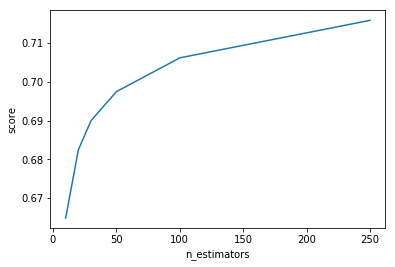

In [25]:
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:01:05. Показатель метрики качества AUC-ROC в таком случае равен 0.69.

Увеличение количества деревьев также увеличивает показатель метрики AUC-ROC, приближая его к 0.72. Для достижения большего качества имеет смысл использовать более 30 деревьев. Для ускорения обучения можно использовать не всю выборку, а некоторое ее подмножество — например, половину объектов. Также можно уменьшить глубину деревьев (max_depth).

# Подход 2: логистическая регрессия

In [26]:
X, y, X_kaggle = helpers.get_clean_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Подбираем оптимальный параметр регуляризации (C)

In [27]:
def plot_C_scores(C_pow_range, scores):
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C):
    print('C =', str(C))
    model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    
def test_model(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C)
        print(model_scores)
        print('Time elapsed:', datetime.datetime.now() - start_time)      
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return C_range[max_score_index], max_score

C = 1e-05
[0.6931532  0.69481539 0.69571379 0.69513159 0.69699445]
Time elapsed: 0:00:02.092425
C = 0.0001
[0.70956686 0.71039474 0.71170336 0.71176082 0.71336295]
Time elapsed: 0:00:02.826660
C = 0.001
[0.71449541 0.71577214 0.71625974 0.71697301 0.71831738]
Time elapsed: 0:00:04.716501
C = 0.01
[0.71464598 0.71617915 0.71624749 0.71735041 0.71832832]
Time elapsed: 0:00:05.613883
C = 0.1
[0.71462192 0.71617479 0.71619187 0.71737596 0.7182712 ]
Time elapsed: 0:00:06.297409
C = 1.0
[0.71461815 0.71617185 0.71618338 0.7173762  0.71826341]
Time elapsed: 0:00:06.260010
C = 10.0
[0.71461695 0.71617179 0.71618281 0.71737669 0.7182632 ]
Time elapsed: 0:00:06.327843
C = 100.0
[0.71461692 0.71617206 0.71618249 0.71737655 0.71826345]
Time elapsed: 0:00:06.235632
C = 1000.0
[0.71461693 0.71617214 0.7161825  0.71737659 0.71826346]
Time elapsed: 0:00:06.224760
C = 10000.0
[0.71461693 0.71617215 0.71618251 0.7173766  0.71826345]
Time elapsed: 0:00:06.256712
C = 100000.0
[0.71461693 0.71617215 0.7161

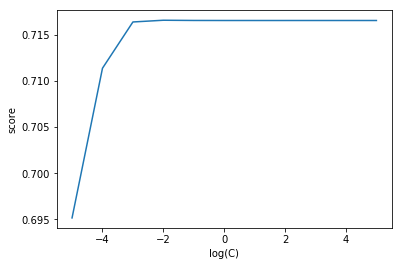

In [28]:
C, score = test_model(X, y)

In [29]:
print(C)
print(score)

0.01
0.716550269725914


Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.71. Это сравнимо с градиентным бустингом по 250 деревьям, при этом логистическая регрессия работает заметно быстрее.

# Удаление категориальных признаков


In [30]:
X, y, X_kaggle = helpers.get_clean_data('clean_category')
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C = 1e-05
[0.69301063 0.69476367 0.69562225 0.69507488 0.69702952]
Time elapsed: 0:00:01.951827
C = 0.0001
[0.70936502 0.71042199 0.71168956 0.71168269 0.71353648]
Time elapsed: 0:00:02.808704
C = 0.001
[0.71434804 0.71581532 0.71629769 0.7168852  0.71853275]
Time elapsed: 0:00:04.151998
C = 0.01
[0.71450425 0.71622052 0.71627999 0.71725088 0.71854131]
Time elapsed: 0:00:04.954950
C = 0.1
[0.71448206 0.71620992 0.71622569 0.71726917 0.71848436]
Time elapsed: 0:00:05.664383
C = 1.0
[0.71447768 0.71620627 0.7162209  0.71727019 0.71847678]
Time elapsed: 0:00:05.878482
C = 10.0
[0.71447669 0.71620645 0.71621968 0.71727123 0.71847581]
Time elapsed: 0:00:05.722505
C = 100.0
[0.7144767  0.71620624 0.71621963 0.71727119 0.71847569]
Time elapsed: 0:00:05.876605
C = 1000.0
[0.71447667 0.71620624 0.71621965 0.71727119 0.71847569]
Time elapsed: 0:00:05.689815
C = 10000.0
[0.71447668 0.71620627 0.71621961 0.71727117 0.71847569]
Time elapsed: 0:00:05.937285
C = 100000.0
[0.71447668 0.71620627 0.7162

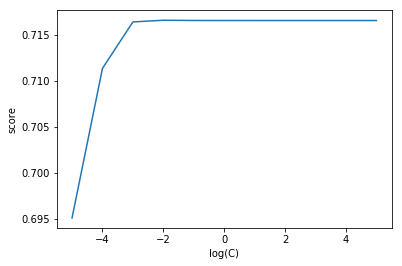

In [31]:
C, score = test_model(X, y)

In [32]:
print(C)
print(score)

0.01
0.7165593885630225


Удаление категориальных признаков не повлияло на качество предсказания. Наилучшее значение показателя AUC-ROC так же достигается при C = 0.01 и равно 0.71. Получается, что в предыдущей модели эти признаки никак не влияли на результат предсказания, модель смогла распознать этот шум.

# "Мешок слов" для кодирования информации о героях.

In [33]:
X, y, X_kaggle = helpers.get_clean_data('clean_category')
X_hero, _y, X_kaggle_hero = helpers.get_clean_data('hero_bag')

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(X), index = X.index)
X_kaggle = pandas.DataFrame(scaler.transform(X_kaggle), index = X_kaggle.index)

X = pandas.concat([X, X_hero], axis=1)
X_kaggle = pandas.concat([X_kaggle, X_kaggle_hero], axis=1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


C = 1e-05
[0.69720207 0.69884021 0.69957686 0.69934071 0.70112123]
Time elapsed: 0:00:02.446773
C = 0.0001
[0.72359118 0.72409682 0.72469067 0.72599494 0.72698389]
Time elapsed: 0:00:03.093736
C = 0.001
[0.74465332 0.74667772 0.74413152 0.74880233 0.74740586]
Time elapsed: 0:00:05.422701
C = 0.01
[0.7494741  0.75279102 0.7492512  0.75538896 0.7517834 ]
Time elapsed: 0:00:08.581447
C = 0.1
[0.74943227 0.75315633 0.74950665 0.75598193 0.75166068]
Time elapsed: 0:00:11.152967
C = 1.0
[0.74936294 0.75316855 0.74949769 0.75602057 0.75158694]
Time elapsed: 0:00:11.763150
C = 10.0
[0.74935123 0.75317116 0.74949885 0.75602554 0.75157988]
Time elapsed: 0:00:11.722421
C = 100.0
[0.74935014 0.75317038 0.74949871 0.7560252  0.75157873]
Time elapsed: 0:00:11.703232
C = 1000.0
[0.7493505  0.7531706  0.74949882 0.7560253  0.75157883]
Time elapsed: 0:00:11.746975
C = 10000.0
[0.7493498  0.75317079 0.74949888 0.7560252  0.75157863]
Time elapsed: 0:00:11.893248
C = 100000.0
[0.74935035 0.75317043 0.7494

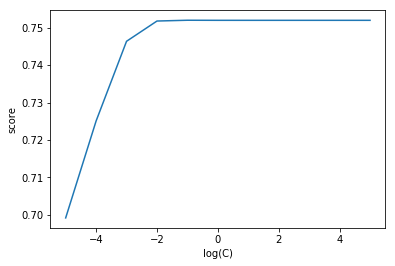

In [34]:
C, score = test_model(X, y)

In [35]:
print(C)
print(score)

0.1
0.7519475726821534


После добавления "мешка слов" по героям качество заметно улучшилось. Наилучшее значение показателя AUC-ROC  достигается при C = 0.1 и равно 0.75. Это объясняется тем, что вместо отсутствия данных о героях или случайного шума из id мы имеем осмысленную разреженную матрицу для построения предсказания.